In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
!wget https://www.dropbox.com/s/sh5yt160xzqjkk0/Food-11.zip?dl=1
!mv Food-11.zip?dl=1 Food_11.zip
!unzip Food_11.zip
!rm -rf Food_11.zip

--2020-05-07 13:20:54--  https://www.dropbox.com/s/sh5yt160xzqjkk0/Food-11.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/sh5yt160xzqjkk0/Food-11.zip [following]
--2020-05-07 13:20:54--  https://www.dropbox.com/s/dl/sh5yt160xzqjkk0/Food-11.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ee6f325a47be91b40a2a6d9dc.dl.dropboxusercontent.com/cd/0/get/A3QWLf7PnOgqCWbJnX1FdSohL4HJzMBxwfp4l1fhotoVrh32ECBVqL0HCBd8qK2K1lBU78TNbOuw2nQVcV4ZcP6dHw-yFZ_NRPIz2pvklHadApHNLF_PcnCF-yheVe-erFw/file?dl=1# [following]
--2020-05-07 13:20:54--  https://uc3ee6f325a47be91b40a2a6d9dc.dl.dropboxusercontent.com/cd/0/get/A3QWLf7PnOgqCWbJnX1FdSohL4HJzMBxwfp4l1fhotoVrh32ECBVqL0HCBd8qK2K1lBU78TNbOuw2nQVcV4ZcP6dHw-yFZ_NRPIz2pvklHadApHNLF_

  inflating: evaluation/0_253.jpg    
  inflating: evaluation/0_254.jpg    
  inflating: evaluation/0_255.jpg    
  inflating: evaluation/0_256.jpg    
  inflating: evaluation/0_257.jpg    
  inflating: evaluation/0_258.jpg    
  inflating: evaluation/0_259.jpg    
  inflating: evaluation/0_26.jpg     
  inflating: evaluation/0_260.jpg    
  inflating: evaluation/0_261.jpg    
  inflating: evaluation/0_262.jpg    
  inflating: evaluation/0_263.jpg    
  inflating: evaluation/0_264.jpg    
  inflating: evaluation/0_265.jpg    
  inflating: evaluation/0_266.jpg    
  inflating: evaluation/0_267.jpg    
  inflating: evaluation/0_268.jpg    
  inflating: evaluation/0_269.jpg    
  inflating: evaluation/0_27.jpg     
  inflating: evaluation/0_270.jpg    
  inflating: evaluation/0_271.jpg    
  inflating: evaluation/0_272.jpg    
  inflating: evaluation/0_273.jpg    
  inflating: evaluation/0_274.jpg    
  inflating: evaluation/0_275.jpg    
  inflating: evaluation/0_276.jpg    
  inflating:

  inflating: evaluation/10_115.jpg   
  inflating: evaluation/10_116.jpg   
  inflating: evaluation/10_117.jpg   
  inflating: evaluation/10_118.jpg   
  inflating: evaluation/10_119.jpg   
  inflating: evaluation/10_12.jpg    
  inflating: evaluation/10_120.jpg   
  inflating: evaluation/10_121.jpg   
  inflating: evaluation/10_122.jpg   
  inflating: evaluation/10_123.jpg   
  inflating: evaluation/10_124.jpg   
  inflating: evaluation/10_125.jpg   
  inflating: evaluation/10_126.jpg   
  inflating: evaluation/10_127.jpg   
  inflating: evaluation/10_128.jpg   
  inflating: evaluation/10_129.jpg   
  inflating: evaluation/10_13.jpg    
  inflating: evaluation/10_130.jpg   
  inflating: evaluation/10_131.jpg   
  inflating: evaluation/10_132.jpg   
  inflating: evaluation/10_133.jpg   
  inflating: evaluation/10_134.jpg   
  inflating: evaluation/10_135.jpg   
  inflating: evaluation/10_136.jpg   
  inflating: evaluation/10_137.jpg   
  inflating: evaluation/10_138.jpg   
  inflating:

  inflating: evaluation/1_103.jpg    
  inflating: evaluation/1_104.jpg    
  inflating: evaluation/1_105.jpg    
  inflating: evaluation/1_106.jpg    
  inflating: evaluation/1_107.jpg    
  inflating: evaluation/1_108.jpg    
  inflating: evaluation/1_109.jpg    
  inflating: evaluation/1_11.jpg     
  inflating: evaluation/1_110.jpg    
  inflating: evaluation/1_111.jpg    
  inflating: evaluation/1_112.jpg    
  inflating: evaluation/1_113.jpg    
  inflating: evaluation/1_114.jpg    
  inflating: evaluation/1_115.jpg    
  inflating: evaluation/1_116.jpg    
  inflating: evaluation/1_117.jpg    
  inflating: evaluation/1_118.jpg    
  inflating: evaluation/1_119.jpg    
  inflating: evaluation/1_12.jpg     
  inflating: evaluation/1_120.jpg    
  inflating: evaluation/1_121.jpg    
  inflating: evaluation/1_122.jpg    
  inflating: evaluation/1_123.jpg    
  inflating: evaluation/1_124.jpg    
  inflating: evaluation/1_125.jpg    
  inflating: evaluation/1_126.jpg    
  inflating:

  inflating: evaluation/2_218.jpg    
  inflating: evaluation/2_219.jpg    
  inflating: evaluation/2_22.jpg     
  inflating: evaluation/2_220.jpg    
  inflating: evaluation/2_221.jpg    
  inflating: evaluation/2_222.jpg    
  inflating: evaluation/2_223.jpg    
  inflating: evaluation/2_224.jpg    
  inflating: evaluation/2_225.jpg    
  inflating: evaluation/2_226.jpg    
  inflating: evaluation/2_227.jpg    
  inflating: evaluation/2_228.jpg    
  inflating: evaluation/2_229.jpg    
  inflating: evaluation/2_23.jpg     
  inflating: evaluation/2_230.jpg    
  inflating: evaluation/2_231.jpg    
  inflating: evaluation/2_232.jpg    
  inflating: evaluation/2_233.jpg    
  inflating: evaluation/2_234.jpg    
  inflating: evaluation/2_235.jpg    
  inflating: evaluation/2_236.jpg    
  inflating: evaluation/2_237.jpg    
  inflating: evaluation/2_238.jpg    
  inflating: evaluation/2_239.jpg    
  inflating: evaluation/2_24.jpg     
  inflating: evaluation/2_240.jpg    
  inflating:

  inflating: evaluation/3_132.jpg    
  inflating: evaluation/3_133.jpg    
  inflating: evaluation/3_134.jpg    
  inflating: evaluation/3_135.jpg    
  inflating: evaluation/3_136.jpg    
  inflating: evaluation/3_137.jpg    
  inflating: evaluation/3_138.jpg    
  inflating: evaluation/3_139.jpg    
  inflating: evaluation/3_14.jpg     
  inflating: evaluation/3_140.jpg    
  inflating: evaluation/3_141.jpg    
  inflating: evaluation/3_142.jpg    
  inflating: evaluation/3_143.jpg    
  inflating: evaluation/3_144.jpg    
  inflating: evaluation/3_145.jpg    
  inflating: evaluation/3_146.jpg    
  inflating: evaluation/3_147.jpg    
  inflating: evaluation/3_148.jpg    
  inflating: evaluation/3_149.jpg    
  inflating: evaluation/3_15.jpg     
  inflating: evaluation/3_150.jpg    
  inflating: evaluation/3_151.jpg    
  inflating: evaluation/3_152.jpg    
  inflating: evaluation/3_153.jpg    
  inflating: evaluation/3_154.jpg    
  inflating: evaluation/3_155.jpg    
  inflating:

  inflating: evaluation/3_64.jpg     
  inflating: evaluation/3_65.jpg     
  inflating: evaluation/3_66.jpg     
  inflating: evaluation/3_67.jpg     
  inflating: evaluation/3_68.jpg     
  inflating: evaluation/3_69.jpg     
  inflating: evaluation/3_7.jpg      
  inflating: evaluation/3_70.jpg     
  inflating: evaluation/3_71.jpg     
  inflating: evaluation/3_72.jpg     
  inflating: evaluation/3_73.jpg     
  inflating: evaluation/3_74.jpg     
  inflating: evaluation/3_75.jpg     
  inflating: evaluation/3_76.jpg     
  inflating: evaluation/3_77.jpg     
  inflating: evaluation/3_78.jpg     
  inflating: evaluation/3_79.jpg     
  inflating: evaluation/3_8.jpg      
  inflating: evaluation/3_80.jpg     
  inflating: evaluation/3_81.jpg     
  inflating: evaluation/3_82.jpg     
  inflating: evaluation/3_83.jpg     
  inflating: evaluation/3_84.jpg     
  inflating: evaluation/3_85.jpg     
  inflating: evaluation/3_86.jpg     
  inflating: evaluation/3_87.jpg     
  inflating:

  inflating: evaluation/4_262.jpg    
  inflating: evaluation/4_263.jpg    
  inflating: evaluation/4_264.jpg    
  inflating: evaluation/4_265.jpg    
  inflating: evaluation/4_266.jpg    
  inflating: evaluation/4_267.jpg    
  inflating: evaluation/4_268.jpg    
  inflating: evaluation/4_269.jpg    
  inflating: evaluation/4_27.jpg     
  inflating: evaluation/4_270.jpg    
  inflating: evaluation/4_271.jpg    
  inflating: evaluation/4_272.jpg    
  inflating: evaluation/4_273.jpg    
  inflating: evaluation/4_274.jpg    
  inflating: evaluation/4_275.jpg    
  inflating: evaluation/4_276.jpg    
  inflating: evaluation/4_277.jpg    
  inflating: evaluation/4_278.jpg    
  inflating: evaluation/4_279.jpg    
  inflating: evaluation/4_28.jpg     
  inflating: evaluation/4_280.jpg    
  inflating: evaluation/4_281.jpg    
  inflating: evaluation/4_282.jpg    
  inflating: evaluation/4_283.jpg    
  inflating: evaluation/4_284.jpg    
  inflating: evaluation/4_285.jpg    
  inflating:

  inflating: evaluation/5_29.jpg     
  inflating: evaluation/5_290.jpg    
  inflating: evaluation/5_291.jpg    
  inflating: evaluation/5_292.jpg    
  inflating: evaluation/5_293.jpg    
  inflating: evaluation/5_294.jpg    
  inflating: evaluation/5_295.jpg    
  inflating: evaluation/5_296.jpg    
  inflating: evaluation/5_297.jpg    
  inflating: evaluation/5_298.jpg    
  inflating: evaluation/5_299.jpg    
  inflating: evaluation/5_3.jpg      
  inflating: evaluation/5_30.jpg     
  inflating: evaluation/5_300.jpg    
  inflating: evaluation/5_301.jpg    
  inflating: evaluation/5_302.jpg    
  inflating: evaluation/5_303.jpg    
  inflating: evaluation/5_304.jpg    
  inflating: evaluation/5_305.jpg    
  inflating: evaluation/5_306.jpg    
  inflating: evaluation/5_307.jpg    
  inflating: evaluation/5_308.jpg    
  inflating: evaluation/5_309.jpg    
  inflating: evaluation/5_31.jpg     
  inflating: evaluation/5_310.jpg    
  inflating: evaluation/5_311.jpg    
  inflating:

  inflating: evaluation/6_46.jpg     
  inflating: evaluation/6_47.jpg     
  inflating: evaluation/6_48.jpg     
  inflating: evaluation/6_49.jpg     
  inflating: evaluation/6_5.jpg      
  inflating: evaluation/6_50.jpg     
  inflating: evaluation/6_51.jpg     
  inflating: evaluation/6_52.jpg     
  inflating: evaluation/6_53.jpg     
  inflating: evaluation/6_54.jpg     
  inflating: evaluation/6_55.jpg     
  inflating: evaluation/6_56.jpg     
  inflating: evaluation/6_57.jpg     
  inflating: evaluation/6_58.jpg     
  inflating: evaluation/6_59.jpg     
  inflating: evaluation/6_6.jpg      
  inflating: evaluation/6_60.jpg     
  inflating: evaluation/6_61.jpg     
  inflating: evaluation/6_62.jpg     
  inflating: evaluation/6_63.jpg     
  inflating: evaluation/6_64.jpg     
  inflating: evaluation/6_65.jpg     
  inflating: evaluation/6_66.jpg     
  inflating: evaluation/6_67.jpg     
  inflating: evaluation/6_68.jpg     
  inflating: evaluation/6_69.jpg     
  inflating:

  inflating: evaluation/8_233.jpg    
  inflating: evaluation/8_234.jpg    
  inflating: evaluation/8_235.jpg    
  inflating: evaluation/8_236.jpg    
  inflating: evaluation/8_237.jpg    
  inflating: evaluation/8_238.jpg    
  inflating: evaluation/8_239.jpg    
  inflating: evaluation/8_24.jpg     
  inflating: evaluation/8_240.jpg    
  inflating: evaluation/8_241.jpg    
  inflating: evaluation/8_242.jpg    
  inflating: evaluation/8_243.jpg    
  inflating: evaluation/8_244.jpg    
  inflating: evaluation/8_245.jpg    
  inflating: evaluation/8_246.jpg    
  inflating: evaluation/8_247.jpg    
  inflating: evaluation/8_248.jpg    
  inflating: evaluation/8_249.jpg    
  inflating: evaluation/8_25.jpg     
  inflating: evaluation/8_250.jpg    
  inflating: evaluation/8_251.jpg    
  inflating: evaluation/8_252.jpg    
  inflating: evaluation/8_253.jpg    
  inflating: evaluation/8_254.jpg    
  inflating: evaluation/8_255.jpg    
  inflating: evaluation/8_256.jpg    
  inflating:

  inflating: evaluation/9_155.jpg    
  inflating: evaluation/9_156.jpg    
  inflating: evaluation/9_157.jpg    
  inflating: evaluation/9_158.jpg    
  inflating: evaluation/9_159.jpg    
  inflating: evaluation/9_16.jpg     
  inflating: evaluation/9_160.jpg    
  inflating: evaluation/9_161.jpg    
  inflating: evaluation/9_162.jpg    
  inflating: evaluation/9_163.jpg    
  inflating: evaluation/9_164.jpg    
  inflating: evaluation/9_165.jpg    
  inflating: evaluation/9_166.jpg    
  inflating: evaluation/9_167.jpg    
  inflating: evaluation/9_168.jpg    
  inflating: evaluation/9_169.jpg    
  inflating: evaluation/9_17.jpg     
  inflating: evaluation/9_170.jpg    
  inflating: evaluation/9_171.jpg    
  inflating: evaluation/9_172.jpg    
  inflating: evaluation/9_173.jpg    
  inflating: evaluation/9_174.jpg    
  inflating: evaluation/9_175.jpg    
  inflating: evaluation/9_176.jpg    
  inflating: evaluation/9_177.jpg    
  inflating: evaluation/9_178.jpg    
  inflating:

  inflating: evaluation/9_373.jpg    
  inflating: evaluation/9_374.jpg    
  inflating: evaluation/9_375.jpg    
  inflating: evaluation/9_376.jpg    
  inflating: evaluation/9_377.jpg    
  inflating: evaluation/9_378.jpg    
  inflating: evaluation/9_379.jpg    
  inflating: evaluation/9_38.jpg     
  inflating: evaluation/9_380.jpg    
  inflating: evaluation/9_381.jpg    
  inflating: evaluation/9_382.jpg    
  inflating: evaluation/9_383.jpg    
  inflating: evaluation/9_384.jpg    
  inflating: evaluation/9_385.jpg    
  inflating: evaluation/9_386.jpg    
  inflating: evaluation/9_387.jpg    
  inflating: evaluation/9_388.jpg    
  inflating: evaluation/9_389.jpg    
  inflating: evaluation/9_39.jpg     
  inflating: evaluation/9_390.jpg    
  inflating: evaluation/9_391.jpg    
  inflating: evaluation/9_392.jpg    
  inflating: evaluation/9_393.jpg    
  inflating: evaluation/9_394.jpg    
  inflating: evaluation/9_395.jpg    
  inflating: evaluation/9_396.jpg    
  inflating:

  inflating: training/0_134.jpg      
  inflating: training/0_135.jpg      
  inflating: training/0_136.jpg      
  inflating: training/0_137.jpg      
  inflating: training/0_138.jpg      
  inflating: training/0_139.jpg      
  inflating: training/0_14.jpg       
  inflating: training/0_140.jpg      
  inflating: training/0_141.jpg      
  inflating: training/0_142.jpg      
  inflating: training/0_143.jpg      
  inflating: training/0_144.jpg      
  inflating: training/0_145.jpg      
  inflating: training/0_146.jpg      
  inflating: training/0_147.jpg      
  inflating: training/0_148.jpg      
  inflating: training/0_149.jpg      
  inflating: training/0_15.jpg       
  inflating: training/0_150.jpg      
  inflating: training/0_151.jpg      
  inflating: training/0_152.jpg      
  inflating: training/0_153.jpg      
  inflating: training/0_154.jpg      
  inflating: training/0_155.jpg      
  inflating: training/0_156.jpg      
  inflating: training/0_157.jpg      
  inflating:

  inflating: training/0_420.jpg      
  inflating: training/0_421.jpg      
  inflating: training/0_422.jpg      
  inflating: training/0_423.jpg      
  inflating: training/0_424.jpg      
  inflating: training/0_425.jpg      
  inflating: training/0_426.jpg      
  inflating: training/0_427.jpg      
  inflating: training/0_428.jpg      
  inflating: training/0_429.jpg      
  inflating: training/0_43.jpg       
  inflating: training/0_430.jpg      
  inflating: training/0_431.jpg      
  inflating: training/0_432.jpg      
  inflating: training/0_433.jpg      
  inflating: training/0_434.jpg      
  inflating: training/0_435.jpg      
  inflating: training/0_436.jpg      
  inflating: training/0_437.jpg      
  inflating: training/0_438.jpg      
  inflating: training/0_439.jpg      
  inflating: training/0_44.jpg       
  inflating: training/0_440.jpg      
  inflating: training/0_441.jpg      
  inflating: training/0_442.jpg      
  inflating: training/0_443.jpg      
  inflating:

  inflating: training/0_702.jpg      
  inflating: training/0_703.jpg      
  inflating: training/0_704.jpg      
  inflating: training/0_705.jpg      
  inflating: training/0_706.jpg      
  inflating: training/0_707.jpg      
  inflating: training/0_708.jpg      
  inflating: training/0_709.jpg      
  inflating: training/0_71.jpg       
  inflating: training/0_710.jpg      
  inflating: training/0_711.jpg      
  inflating: training/0_712.jpg      
  inflating: training/0_713.jpg      
  inflating: training/0_714.jpg      
  inflating: training/0_715.jpg      
  inflating: training/0_716.jpg      
  inflating: training/0_717.jpg      
  inflating: training/0_718.jpg      
  inflating: training/0_719.jpg      
  inflating: training/0_72.jpg       
  inflating: training/0_720.jpg      
  inflating: training/0_721.jpg      
  inflating: training/0_722.jpg      
  inflating: training/0_723.jpg      
  inflating: training/0_724.jpg      
  inflating: training/0_725.jpg      
  inflating:

  inflating: training/0_908.jpg      
  inflating: training/0_909.jpg      
  inflating: training/0_91.jpg       
  inflating: training/0_910.jpg      
  inflating: training/0_911.jpg      
  inflating: training/0_912.jpg      
  inflating: training/0_913.jpg      
  inflating: training/0_914.jpg      
  inflating: training/0_915.jpg      
  inflating: training/0_916.jpg      
  inflating: training/0_917.jpg      
  inflating: training/0_918.jpg      
  inflating: training/0_919.jpg      
  inflating: training/0_92.jpg       
  inflating: training/0_920.jpg      
  inflating: training/0_921.jpg      
  inflating: training/0_922.jpg      
  inflating: training/0_923.jpg      
  inflating: training/0_924.jpg      
  inflating: training/0_925.jpg      
  inflating: training/0_926.jpg      
  inflating: training/0_927.jpg      
  inflating: training/0_928.jpg      
  inflating: training/0_929.jpg      
  inflating: training/0_93.jpg       
  inflating: training/0_930.jpg      
  inflating:

  inflating: training/10_210.jpg     
  inflating: training/10_211.jpg     
  inflating: training/10_212.jpg     
  inflating: training/10_213.jpg     
  inflating: training/10_214.jpg     
  inflating: training/10_215.jpg     
  inflating: training/10_216.jpg     
  inflating: training/10_217.jpg     
  inflating: training/10_218.jpg     
  inflating: training/10_219.jpg     
  inflating: training/10_22.jpg      
  inflating: training/10_220.jpg     
  inflating: training/10_221.jpg     
  inflating: training/10_222.jpg     
  inflating: training/10_223.jpg     
  inflating: training/10_224.jpg     
  inflating: training/10_225.jpg     
  inflating: training/10_226.jpg     
  inflating: training/10_227.jpg     
  inflating: training/10_228.jpg     
  inflating: training/10_229.jpg     
  inflating: training/10_23.jpg      
  inflating: training/10_230.jpg     
  inflating: training/10_231.jpg     
  inflating: training/10_232.jpg     
  inflating: training/10_233.jpg     
  inflating:

  inflating: training/10_418.jpg     
  inflating: training/10_419.jpg     
  inflating: training/10_42.jpg      
  inflating: training/10_420.jpg     
  inflating: training/10_421.jpg     
  inflating: training/10_422.jpg     
  inflating: training/10_423.jpg     
  inflating: training/10_424.jpg     
  inflating: training/10_425.jpg     
  inflating: training/10_426.jpg     
  inflating: training/10_427.jpg     
  inflating: training/10_428.jpg     
  inflating: training/10_429.jpg     
  inflating: training/10_43.jpg      
  inflating: training/10_430.jpg     
  inflating: training/10_431.jpg     
  inflating: training/10_432.jpg     
  inflating: training/10_433.jpg     
  inflating: training/10_434.jpg     
  inflating: training/10_435.jpg     
  inflating: training/10_436.jpg     
  inflating: training/10_437.jpg     
  inflating: training/10_438.jpg     
  inflating: training/10_439.jpg     
  inflating: training/10_44.jpg      
  inflating: training/10_440.jpg     
  inflating:

  inflating: training/10_630.jpg     
  inflating: training/10_631.jpg     
  inflating: training/10_632.jpg     
  inflating: training/10_633.jpg     
  inflating: training/10_634.jpg     
  inflating: training/10_635.jpg     
  inflating: training/10_636.jpg     
  inflating: training/10_637.jpg     
  inflating: training/10_638.jpg     
  inflating: training/10_639.jpg     
  inflating: training/10_64.jpg      
  inflating: training/10_640.jpg     
  inflating: training/10_641.jpg     
  inflating: training/10_642.jpg     
  inflating: training/10_643.jpg     
  inflating: training/10_644.jpg     
  inflating: training/10_645.jpg     
  inflating: training/10_646.jpg     
  inflating: training/10_647.jpg     
  inflating: training/10_648.jpg     
  inflating: training/10_649.jpg     
  inflating: training/10_65.jpg      
  inflating: training/10_650.jpg     
  inflating: training/10_651.jpg     
  inflating: training/10_652.jpg     
  inflating: training/10_653.jpg     
  inflating:

  inflating: training/1_19.jpg       
  inflating: training/1_190.jpg      
  inflating: training/1_191.jpg      
  inflating: training/1_192.jpg      
  inflating: training/1_193.jpg      
  inflating: training/1_194.jpg      
  inflating: training/1_195.jpg      
  inflating: training/1_196.jpg      
  inflating: training/1_197.jpg      
  inflating: training/1_198.jpg      
  inflating: training/1_199.jpg      
  inflating: training/1_2.jpg        
  inflating: training/1_20.jpg       
  inflating: training/1_200.jpg      
  inflating: training/1_201.jpg      
  inflating: training/1_202.jpg      
  inflating: training/1_203.jpg      
  inflating: training/1_204.jpg      
  inflating: training/1_205.jpg      
  inflating: training/1_206.jpg      
  inflating: training/1_207.jpg      
  inflating: training/1_208.jpg      
  inflating: training/1_209.jpg      
  inflating: training/1_21.jpg       
  inflating: training/1_210.jpg      
  inflating: training/1_211.jpg      
  inflating:

  inflating: training/1_69.jpg       
  inflating: training/1_7.jpg        
  inflating: training/1_70.jpg       
  inflating: training/1_71.jpg       
  inflating: training/1_72.jpg       
  inflating: training/1_73.jpg       
  inflating: training/1_74.jpg       
  inflating: training/1_75.jpg       
  inflating: training/1_76.jpg       
  inflating: training/1_77.jpg       
  inflating: training/1_78.jpg       
  inflating: training/1_79.jpg       
  inflating: training/1_8.jpg        
  inflating: training/1_80.jpg       
  inflating: training/1_81.jpg       
  inflating: training/1_82.jpg       
  inflating: training/1_83.jpg       
  inflating: training/1_84.jpg       
  inflating: training/1_85.jpg       
  inflating: training/1_86.jpg       
  inflating: training/1_87.jpg       
  inflating: training/1_88.jpg       
  inflating: training/1_89.jpg       
  inflating: training/1_9.jpg        
  inflating: training/1_90.jpg       
  inflating: training/1_91.jpg       
  inflating:

  inflating: training/2_1260.jpg     
  inflating: training/2_1261.jpg     
  inflating: training/2_1262.jpg     
  inflating: training/2_1263.jpg     
  inflating: training/2_1264.jpg     
  inflating: training/2_1265.jpg     
  inflating: training/2_1266.jpg     
  inflating: training/2_1267.jpg     
  inflating: training/2_1268.jpg     
  inflating: training/2_1269.jpg     
  inflating: training/2_127.jpg      
  inflating: training/2_1270.jpg     
  inflating: training/2_1271.jpg     
  inflating: training/2_1272.jpg     
  inflating: training/2_1273.jpg     
  inflating: training/2_1274.jpg     
  inflating: training/2_1275.jpg     
  inflating: training/2_1276.jpg     
  inflating: training/2_1277.jpg     
  inflating: training/2_1278.jpg     
  inflating: training/2_1279.jpg     
  inflating: training/2_128.jpg      
  inflating: training/2_1280.jpg     
  inflating: training/2_1281.jpg     
  inflating: training/2_1282.jpg     
  inflating: training/2_1283.jpg     
  inflating:

  inflating: training/2_1463.jpg     
  inflating: training/2_1464.jpg     
  inflating: training/2_1465.jpg     
  inflating: training/2_1466.jpg     
  inflating: training/2_1467.jpg     
  inflating: training/2_1468.jpg     
  inflating: training/2_1469.jpg     
  inflating: training/2_147.jpg      
  inflating: training/2_1470.jpg     
  inflating: training/2_1471.jpg     
  inflating: training/2_1472.jpg     
  inflating: training/2_1473.jpg     
  inflating: training/2_1474.jpg     
  inflating: training/2_1475.jpg     
  inflating: training/2_1476.jpg     
  inflating: training/2_1477.jpg     
  inflating: training/2_1478.jpg     
  inflating: training/2_1479.jpg     
  inflating: training/2_148.jpg      
  inflating: training/2_1480.jpg     
  inflating: training/2_1481.jpg     
  inflating: training/2_1482.jpg     
  inflating: training/2_1483.jpg     
  inflating: training/2_1484.jpg     
  inflating: training/2_1485.jpg     
  inflating: training/2_1486.jpg     
  inflating:

  inflating: training/2_401.jpg      
  inflating: training/2_402.jpg      
  inflating: training/2_403.jpg      
  inflating: training/2_404.jpg      
  inflating: training/2_405.jpg      
  inflating: training/2_406.jpg      
  inflating: training/2_407.jpg      
  inflating: training/2_408.jpg      
  inflating: training/2_409.jpg      
  inflating: training/2_41.jpg       
  inflating: training/2_410.jpg      
  inflating: training/2_411.jpg      
  inflating: training/2_412.jpg      
  inflating: training/2_413.jpg      
  inflating: training/2_414.jpg      
  inflating: training/2_415.jpg      
  inflating: training/2_416.jpg      
  inflating: training/2_417.jpg      
  inflating: training/2_418.jpg      
  inflating: training/2_419.jpg      
  inflating: training/2_42.jpg       
  inflating: training/2_420.jpg      
  inflating: training/2_421.jpg      
  inflating: training/2_422.jpg      
  inflating: training/2_423.jpg      
  inflating: training/2_424.jpg      
  inflating:

  inflating: training/2_605.jpg      
  inflating: training/2_606.jpg      
  inflating: training/2_607.jpg      
  inflating: training/2_608.jpg      
  inflating: training/2_609.jpg      
  inflating: training/2_61.jpg       
  inflating: training/2_610.jpg      
  inflating: training/2_611.jpg      
  inflating: training/2_612.jpg      
  inflating: training/2_613.jpg      
  inflating: training/2_614.jpg      
  inflating: training/2_615.jpg      
  inflating: training/2_616.jpg      
  inflating: training/2_617.jpg      
  inflating: training/2_618.jpg      
  inflating: training/2_619.jpg      
  inflating: training/2_62.jpg       
  inflating: training/2_620.jpg      
  inflating: training/2_621.jpg      
  inflating: training/2_622.jpg      
  inflating: training/2_623.jpg      
  inflating: training/2_624.jpg      
  inflating: training/2_625.jpg      
  inflating: training/2_626.jpg      
  inflating: training/2_627.jpg      
  inflating: training/2_628.jpg      
  inflating:

  inflating: training/2_810.jpg      
  inflating: training/2_811.jpg      
  inflating: training/2_812.jpg      
  inflating: training/2_813.jpg      
  inflating: training/2_814.jpg      
  inflating: training/2_815.jpg      
  inflating: training/2_816.jpg      
  inflating: training/2_817.jpg      
  inflating: training/2_818.jpg      
  inflating: training/2_819.jpg      
  inflating: training/2_82.jpg       
  inflating: training/2_820.jpg      
  inflating: training/2_821.jpg      
  inflating: training/2_822.jpg      
  inflating: training/2_823.jpg      
  inflating: training/2_824.jpg      
  inflating: training/2_825.jpg      
  inflating: training/2_826.jpg      
  inflating: training/2_827.jpg      
  inflating: training/2_828.jpg      
  inflating: training/2_829.jpg      
  inflating: training/2_83.jpg       
  inflating: training/2_830.jpg      
  inflating: training/2_831.jpg      
  inflating: training/2_832.jpg      
  inflating: training/2_833.jpg      
  inflating:

  inflating: training/3_117.jpg      
  inflating: training/3_118.jpg      
  inflating: training/3_119.jpg      
  inflating: training/3_12.jpg       
  inflating: training/3_120.jpg      
  inflating: training/3_121.jpg      
  inflating: training/3_122.jpg      
  inflating: training/3_123.jpg      
  inflating: training/3_124.jpg      
  inflating: training/3_125.jpg      
  inflating: training/3_126.jpg      
  inflating: training/3_127.jpg      
  inflating: training/3_128.jpg      
  inflating: training/3_129.jpg      
  inflating: training/3_13.jpg       
  inflating: training/3_130.jpg      
  inflating: training/3_131.jpg      
  inflating: training/3_132.jpg      
  inflating: training/3_133.jpg      
  inflating: training/3_134.jpg      
  inflating: training/3_135.jpg      
  inflating: training/3_136.jpg      
  inflating: training/3_137.jpg      
  inflating: training/3_138.jpg      
  inflating: training/3_139.jpg      
  inflating: training/3_14.jpg       
  inflating:

  inflating: training/3_321.jpg      
  inflating: training/3_322.jpg      
  inflating: training/3_323.jpg      
  inflating: training/3_324.jpg      
  inflating: training/3_325.jpg      
  inflating: training/3_326.jpg      
  inflating: training/3_327.jpg      
  inflating: training/3_328.jpg      
  inflating: training/3_329.jpg      
  inflating: training/3_33.jpg       
  inflating: training/3_330.jpg      
  inflating: training/3_331.jpg      
  inflating: training/3_332.jpg      
  inflating: training/3_333.jpg      
  inflating: training/3_334.jpg      
  inflating: training/3_335.jpg      
  inflating: training/3_336.jpg      
  inflating: training/3_337.jpg      
  inflating: training/3_338.jpg      
  inflating: training/3_339.jpg      
  inflating: training/3_34.jpg       
  inflating: training/3_340.jpg      
  inflating: training/3_341.jpg      
  inflating: training/3_342.jpg      
  inflating: training/3_343.jpg      
  inflating: training/3_344.jpg      
  inflating:

  inflating: training/3_521.jpg      
  inflating: training/3_522.jpg      
  inflating: training/3_523.jpg      
  inflating: training/3_524.jpg      
  inflating: training/3_525.jpg      
  inflating: training/3_526.jpg      
  inflating: training/3_527.jpg      
  inflating: training/3_528.jpg      
  inflating: training/3_529.jpg      
  inflating: training/3_53.jpg       
  inflating: training/3_530.jpg      
  inflating: training/3_531.jpg      
  inflating: training/3_532.jpg      
  inflating: training/3_533.jpg      
  inflating: training/3_534.jpg      
  inflating: training/3_535.jpg      
  inflating: training/3_536.jpg      
  inflating: training/3_537.jpg      
  inflating: training/3_538.jpg      
  inflating: training/3_539.jpg      
  inflating: training/3_54.jpg       
  inflating: training/3_540.jpg      
  inflating: training/3_541.jpg      
  inflating: training/3_542.jpg      
  inflating: training/3_543.jpg      
  inflating: training/3_544.jpg      
  inflating:

  inflating: training/3_725.jpg      
  inflating: training/3_726.jpg      
  inflating: training/3_727.jpg      
  inflating: training/3_728.jpg      
  inflating: training/3_729.jpg      
  inflating: training/3_73.jpg       
  inflating: training/3_730.jpg      
  inflating: training/3_731.jpg      
  inflating: training/3_732.jpg      
  inflating: training/3_733.jpg      
  inflating: training/3_734.jpg      
  inflating: training/3_735.jpg      
  inflating: training/3_736.jpg      
  inflating: training/3_737.jpg      
  inflating: training/3_738.jpg      
  inflating: training/3_739.jpg      
  inflating: training/3_74.jpg       
  inflating: training/3_740.jpg      
  inflating: training/3_741.jpg      
  inflating: training/3_742.jpg      
  inflating: training/3_743.jpg      
  inflating: training/3_744.jpg      
  inflating: training/3_745.jpg      
  inflating: training/3_746.jpg      
  inflating: training/3_747.jpg      
  inflating: training/3_748.jpg      
  inflating:

  inflating: training/3_937.jpg      
  inflating: training/3_938.jpg      
  inflating: training/3_939.jpg      
  inflating: training/3_94.jpg       
  inflating: training/3_940.jpg      
  inflating: training/3_941.jpg      
  inflating: training/3_942.jpg      
  inflating: training/3_943.jpg      
  inflating: training/3_944.jpg      
  inflating: training/3_945.jpg      
  inflating: training/3_946.jpg      
  inflating: training/3_947.jpg      
  inflating: training/3_948.jpg      
  inflating: training/3_949.jpg      
  inflating: training/3_95.jpg       
  inflating: training/3_950.jpg      
  inflating: training/3_951.jpg      
  inflating: training/3_952.jpg      
  inflating: training/3_953.jpg      
  inflating: training/3_954.jpg      
  inflating: training/3_955.jpg      
  inflating: training/3_956.jpg      
  inflating: training/3_957.jpg      
  inflating: training/3_958.jpg      
  inflating: training/3_959.jpg      
  inflating: training/3_96.jpg       
  inflating:

  inflating: training/4_245.jpg      
  inflating: training/4_246.jpg      
  inflating: training/4_247.jpg      
  inflating: training/4_248.jpg      
  inflating: training/4_249.jpg      
  inflating: training/4_25.jpg       
  inflating: training/4_250.jpg      
  inflating: training/4_251.jpg      
  inflating: training/4_252.jpg      
  inflating: training/4_253.jpg      
  inflating: training/4_254.jpg      
  inflating: training/4_255.jpg      
  inflating: training/4_256.jpg      
  inflating: training/4_257.jpg      
  inflating: training/4_258.jpg      
  inflating: training/4_259.jpg      
  inflating: training/4_26.jpg       
  inflating: training/4_260.jpg      
  inflating: training/4_261.jpg      
  inflating: training/4_262.jpg      
  inflating: training/4_263.jpg      
  inflating: training/4_264.jpg      
  inflating: training/4_265.jpg      
  inflating: training/4_266.jpg      
  inflating: training/4_267.jpg      
  inflating: training/4_268.jpg      
  inflating:

  inflating: training/4_453.jpg      
  inflating: training/4_454.jpg      
  inflating: training/4_455.jpg      
  inflating: training/4_456.jpg      
  inflating: training/4_457.jpg      
  inflating: training/4_458.jpg      
  inflating: training/4_459.jpg      
  inflating: training/4_46.jpg       
  inflating: training/4_460.jpg      
  inflating: training/4_461.jpg      
  inflating: training/4_462.jpg      
  inflating: training/4_463.jpg      
  inflating: training/4_464.jpg      
  inflating: training/4_465.jpg      
  inflating: training/4_466.jpg      
  inflating: training/4_467.jpg      
  inflating: training/4_468.jpg      
  inflating: training/4_469.jpg      
  inflating: training/4_47.jpg       
  inflating: training/4_470.jpg      
  inflating: training/4_471.jpg      
  inflating: training/4_472.jpg      
  inflating: training/4_473.jpg      
  inflating: training/4_474.jpg      
  inflating: training/4_475.jpg      
  inflating: training/4_476.jpg      
  inflating:

  inflating: training/4_650.jpg      
  inflating: training/4_651.jpg      
  inflating: training/4_652.jpg      
  inflating: training/4_653.jpg      
  inflating: training/4_654.jpg      
  inflating: training/4_655.jpg      
  inflating: training/4_656.jpg      
  inflating: training/4_657.jpg      
  inflating: training/4_658.jpg      
  inflating: training/4_659.jpg      
  inflating: training/4_66.jpg       
  inflating: training/4_660.jpg      
  inflating: training/4_661.jpg      
  inflating: training/4_662.jpg      
  inflating: training/4_663.jpg      
  inflating: training/4_664.jpg      
  inflating: training/4_665.jpg      
  inflating: training/4_666.jpg      
  inflating: training/4_667.jpg      
  inflating: training/4_668.jpg      
  inflating: training/4_669.jpg      
  inflating: training/4_67.jpg       
  inflating: training/4_670.jpg      
  inflating: training/4_671.jpg      
  inflating: training/4_672.jpg      
  inflating: training/4_673.jpg      
  inflating:

  inflating: training/4_86.jpg       
  inflating: training/4_87.jpg       
  inflating: training/4_88.jpg       
  inflating: training/4_89.jpg       
  inflating: training/4_9.jpg        
  inflating: training/4_90.jpg       
  inflating: training/4_91.jpg       
  inflating: training/4_92.jpg       
  inflating: training/4_93.jpg       
  inflating: training/4_94.jpg       
  inflating: training/4_95.jpg       
  inflating: training/4_96.jpg       
  inflating: training/4_97.jpg       
  inflating: training/4_98.jpg       
  inflating: training/4_99.jpg       
  inflating: training/5_0.jpg        
  inflating: training/5_1.jpg        
  inflating: training/5_10.jpg       
  inflating: training/5_100.jpg      
  inflating: training/5_1000.jpg     
  inflating: training/5_1001.jpg     
  inflating: training/5_1002.jpg     
  inflating: training/5_1003.jpg     
  inflating: training/5_1004.jpg     
  inflating: training/5_1005.jpg     
  inflating: training/5_1006.jpg     
  inflating:

  inflating: training/5_118.jpg      
  inflating: training/5_1180.jpg     
  inflating: training/5_1181.jpg     
  inflating: training/5_1182.jpg     
  inflating: training/5_1183.jpg     
  inflating: training/5_1184.jpg     
  inflating: training/5_1185.jpg     
  inflating: training/5_1186.jpg     
  inflating: training/5_1187.jpg     
  inflating: training/5_1188.jpg     
  inflating: training/5_1189.jpg     
  inflating: training/5_119.jpg      
  inflating: training/5_1190.jpg     
  inflating: training/5_1191.jpg     
  inflating: training/5_1192.jpg     
  inflating: training/5_1193.jpg     
  inflating: training/5_1194.jpg     
  inflating: training/5_1195.jpg     
  inflating: training/5_1196.jpg     
  inflating: training/5_1197.jpg     
  inflating: training/5_1198.jpg     
  inflating: training/5_1199.jpg     
  inflating: training/5_12.jpg       
  inflating: training/5_120.jpg      
  inflating: training/5_1200.jpg     
  inflating: training/5_1201.jpg     
  inflating:

  inflating: training/5_183.jpg      
  inflating: training/5_184.jpg      
  inflating: training/5_185.jpg      
  inflating: training/5_186.jpg      
  inflating: training/5_187.jpg      
  inflating: training/5_188.jpg      
  inflating: training/5_189.jpg      
  inflating: training/5_19.jpg       
  inflating: training/5_190.jpg      
  inflating: training/5_191.jpg      
  inflating: training/5_192.jpg      
  inflating: training/5_193.jpg      
  inflating: training/5_194.jpg      
  inflating: training/5_195.jpg      
  inflating: training/5_196.jpg      
  inflating: training/5_197.jpg      
  inflating: training/5_198.jpg      
  inflating: training/5_199.jpg      
  inflating: training/5_2.jpg        
  inflating: training/5_20.jpg       
  inflating: training/5_200.jpg      
  inflating: training/5_201.jpg      
  inflating: training/5_202.jpg      
  inflating: training/5_203.jpg      
  inflating: training/5_204.jpg      
  inflating: training/5_205.jpg      
  inflating:

  inflating: training/5_462.jpg      
  inflating: training/5_463.jpg      
  inflating: training/5_464.jpg      
  inflating: training/5_465.jpg      
  inflating: training/5_466.jpg      
  inflating: training/5_467.jpg      
  inflating: training/5_468.jpg      
  inflating: training/5_469.jpg      
  inflating: training/5_47.jpg       
  inflating: training/5_470.jpg      
  inflating: training/5_471.jpg      
  inflating: training/5_472.jpg      
  inflating: training/5_473.jpg      
  inflating: training/5_474.jpg      
  inflating: training/5_475.jpg      
  inflating: training/5_476.jpg      
  inflating: training/5_477.jpg      
  inflating: training/5_478.jpg      
  inflating: training/5_479.jpg      
  inflating: training/5_48.jpg       
  inflating: training/5_480.jpg      
  inflating: training/5_481.jpg      
  inflating: training/5_482.jpg      
  inflating: training/5_483.jpg      
  inflating: training/5_484.jpg      
  inflating: training/5_485.jpg      
  inflating:

  inflating: training/5_733.jpg      
  inflating: training/5_734.jpg      
  inflating: training/5_735.jpg      
  inflating: training/5_736.jpg      
  inflating: training/5_737.jpg      
  inflating: training/5_738.jpg      
  inflating: training/5_739.jpg      
  inflating: training/5_74.jpg       
  inflating: training/5_740.jpg      
  inflating: training/5_741.jpg      
  inflating: training/5_742.jpg      
  inflating: training/5_743.jpg      
  inflating: training/5_744.jpg      
  inflating: training/5_745.jpg      
  inflating: training/5_746.jpg      
  inflating: training/5_747.jpg      
  inflating: training/5_748.jpg      
  inflating: training/5_749.jpg      
  inflating: training/5_75.jpg       
  inflating: training/5_750.jpg      
  inflating: training/5_751.jpg      
  inflating: training/5_752.jpg      
  inflating: training/5_753.jpg      
  inflating: training/5_754.jpg      
  inflating: training/5_755.jpg      
  inflating: training/5_756.jpg      
  inflating:

  inflating: training/5_929.jpg      
  inflating: training/5_93.jpg       
  inflating: training/5_930.jpg      
  inflating: training/5_931.jpg      
  inflating: training/5_932.jpg      
  inflating: training/5_933.jpg      
  inflating: training/5_934.jpg      
  inflating: training/5_935.jpg      
  inflating: training/5_936.jpg      
  inflating: training/5_937.jpg      
  inflating: training/5_938.jpg      
  inflating: training/5_939.jpg      
  inflating: training/5_94.jpg       
  inflating: training/5_940.jpg      
  inflating: training/5_941.jpg      
  inflating: training/5_942.jpg      
  inflating: training/5_943.jpg      
  inflating: training/5_944.jpg      
  inflating: training/5_945.jpg      
  inflating: training/5_946.jpg      
  inflating: training/5_947.jpg      
  inflating: training/5_948.jpg      
  inflating: training/5_949.jpg      
  inflating: training/5_95.jpg       
  inflating: training/5_950.jpg      
  inflating: training/5_951.jpg      
  inflating:

  inflating: training/6_268.jpg      
  inflating: training/6_269.jpg      
  inflating: training/6_27.jpg       
  inflating: training/6_270.jpg      
  inflating: training/6_271.jpg      
  inflating: training/6_272.jpg      
  inflating: training/6_273.jpg      
  inflating: training/6_274.jpg      
  inflating: training/6_275.jpg      
  inflating: training/6_276.jpg      
  inflating: training/6_277.jpg      
  inflating: training/6_278.jpg      
  inflating: training/6_279.jpg      
  inflating: training/6_28.jpg       
  inflating: training/6_280.jpg      
  inflating: training/6_281.jpg      
  inflating: training/6_282.jpg      
  inflating: training/6_283.jpg      
  inflating: training/6_284.jpg      
  inflating: training/6_285.jpg      
  inflating: training/6_286.jpg      
  inflating: training/6_287.jpg      
  inflating: training/6_288.jpg      
  inflating: training/6_289.jpg      
  inflating: training/6_29.jpg       
  inflating: training/6_290.jpg      
  inflating:

  inflating: training/6_70.jpg       
  inflating: training/6_71.jpg       
  inflating: training/6_72.jpg       
  inflating: training/6_73.jpg       
  inflating: training/6_74.jpg       
  inflating: training/6_75.jpg       
  inflating: training/6_76.jpg       
  inflating: training/6_77.jpg       
  inflating: training/6_78.jpg       
  inflating: training/6_79.jpg       
  inflating: training/6_8.jpg        
  inflating: training/6_80.jpg       
  inflating: training/6_81.jpg       
  inflating: training/6_82.jpg       
  inflating: training/6_83.jpg       
  inflating: training/6_84.jpg       
  inflating: training/6_85.jpg       
  inflating: training/6_86.jpg       
  inflating: training/6_87.jpg       
  inflating: training/6_88.jpg       
  inflating: training/6_89.jpg       
  inflating: training/6_9.jpg        
  inflating: training/6_90.jpg       
  inflating: training/6_91.jpg       
  inflating: training/6_92.jpg       
  inflating: training/6_93.jpg       
  inflating:

  inflating: training/7_274.jpg      
  inflating: training/7_275.jpg      
  inflating: training/7_276.jpg      
  inflating: training/7_277.jpg      
  inflating: training/7_278.jpg      
  inflating: training/7_279.jpg      
  inflating: training/7_28.jpg       
  inflating: training/7_29.jpg       
  inflating: training/7_3.jpg        
  inflating: training/7_30.jpg       
  inflating: training/7_31.jpg       
  inflating: training/7_32.jpg       
  inflating: training/7_33.jpg       
  inflating: training/7_34.jpg       
  inflating: training/7_35.jpg       
  inflating: training/7_36.jpg       
  inflating: training/7_37.jpg       
  inflating: training/7_38.jpg       
  inflating: training/7_39.jpg       
  inflating: training/7_4.jpg        
  inflating: training/7_40.jpg       
  inflating: training/7_41.jpg       
  inflating: training/7_42.jpg       
  inflating: training/7_43.jpg       
  inflating: training/7_44.jpg       
  inflating: training/7_45.jpg       
  inflating:

  inflating: training/8_350.jpg      
  inflating: training/8_351.jpg      
  inflating: training/8_352.jpg      
  inflating: training/8_353.jpg      
  inflating: training/8_354.jpg      
  inflating: training/8_355.jpg      
  inflating: training/8_356.jpg      
  inflating: training/8_357.jpg      
  inflating: training/8_358.jpg      
  inflating: training/8_359.jpg      
  inflating: training/8_36.jpg       
  inflating: training/8_360.jpg      
  inflating: training/8_361.jpg      
  inflating: training/8_362.jpg      
  inflating: training/8_363.jpg      
  inflating: training/8_364.jpg      
  inflating: training/8_365.jpg      
  inflating: training/8_366.jpg      
  inflating: training/8_367.jpg      
  inflating: training/8_368.jpg      
  inflating: training/8_369.jpg      
  inflating: training/8_37.jpg       
  inflating: training/8_370.jpg      
  inflating: training/8_371.jpg      
  inflating: training/8_372.jpg      
  inflating: training/8_373.jpg      
  inflating:

  inflating: training/8_629.jpg      
  inflating: training/8_63.jpg       
  inflating: training/8_630.jpg      
  inflating: training/8_631.jpg      
  inflating: training/8_632.jpg      
  inflating: training/8_633.jpg      
  inflating: training/8_634.jpg      
  inflating: training/8_635.jpg      
  inflating: training/8_636.jpg      
  inflating: training/8_637.jpg      
  inflating: training/8_638.jpg      
  inflating: training/8_639.jpg      
  inflating: training/8_64.jpg       
  inflating: training/8_640.jpg      
  inflating: training/8_641.jpg      
  inflating: training/8_642.jpg      
  inflating: training/8_643.jpg      
  inflating: training/8_644.jpg      
  inflating: training/8_645.jpg      
  inflating: training/8_646.jpg      
  inflating: training/8_647.jpg      
  inflating: training/8_648.jpg      
  inflating: training/8_649.jpg      
  inflating: training/8_65.jpg       
  inflating: training/8_650.jpg      
  inflating: training/8_651.jpg      
  inflating:

  inflating: training/9_1056.jpg     
  inflating: training/9_1057.jpg     
  inflating: training/9_1058.jpg     
  inflating: training/9_1059.jpg     
  inflating: training/9_106.jpg      
  inflating: training/9_1060.jpg     
  inflating: training/9_1061.jpg     
  inflating: training/9_1062.jpg     
  inflating: training/9_1063.jpg     
  inflating: training/9_1064.jpg     
  inflating: training/9_1065.jpg     
  inflating: training/9_1066.jpg     
  inflating: training/9_1067.jpg     
  inflating: training/9_1068.jpg     
  inflating: training/9_1069.jpg     
  inflating: training/9_107.jpg      
  inflating: training/9_1070.jpg     
  inflating: training/9_1071.jpg     
  inflating: training/9_1072.jpg     
  inflating: training/9_1073.jpg     
  inflating: training/9_1074.jpg     
  inflating: training/9_1075.jpg     
  inflating: training/9_1076.jpg     
  inflating: training/9_1077.jpg     
  inflating: training/9_1078.jpg     
  inflating: training/9_1079.jpg     
  inflating:

  inflating: training/9_1278.jpg     
  inflating: training/9_1279.jpg     
  inflating: training/9_128.jpg      
  inflating: training/9_1280.jpg     
  inflating: training/9_1281.jpg     
  inflating: training/9_1282.jpg     
  inflating: training/9_1283.jpg     
  inflating: training/9_1284.jpg     
  inflating: training/9_1285.jpg     
  inflating: training/9_1286.jpg     
  inflating: training/9_1287.jpg     
  inflating: training/9_1288.jpg     
  inflating: training/9_1289.jpg     
  inflating: training/9_129.jpg      
  inflating: training/9_1290.jpg     
  inflating: training/9_1291.jpg     
  inflating: training/9_1292.jpg     
  inflating: training/9_1293.jpg     
  inflating: training/9_1294.jpg     
  inflating: training/9_1295.jpg     
  inflating: training/9_1296.jpg     
  inflating: training/9_1297.jpg     
  inflating: training/9_1298.jpg     
  inflating: training/9_1299.jpg     
  inflating: training/9_13.jpg       
  inflating: training/9_130.jpg      
  inflating:

  inflating: training/9_1499.jpg     
  inflating: training/9_15.jpg       
  inflating: training/9_150.jpg      
  inflating: training/9_151.jpg      
  inflating: training/9_152.jpg      
  inflating: training/9_153.jpg      
  inflating: training/9_154.jpg      
  inflating: training/9_155.jpg      
  inflating: training/9_156.jpg      
  inflating: training/9_157.jpg      
  inflating: training/9_158.jpg      
  inflating: training/9_159.jpg      
  inflating: training/9_16.jpg       
  inflating: training/9_160.jpg      
  inflating: training/9_161.jpg      
  inflating: training/9_162.jpg      
  inflating: training/9_163.jpg      
  inflating: training/9_164.jpg      
  inflating: training/9_165.jpg      
  inflating: training/9_166.jpg      
  inflating: training/9_167.jpg      
  inflating: training/9_168.jpg      
  inflating: training/9_169.jpg      
  inflating: training/9_17.jpg       
  inflating: training/9_170.jpg      
  inflating: training/9_171.jpg      
  inflating:

  inflating: training/9_370.jpg      
  inflating: training/9_371.jpg      
  inflating: training/9_372.jpg      
  inflating: training/9_373.jpg      
  inflating: training/9_374.jpg      
  inflating: training/9_375.jpg      
  inflating: training/9_376.jpg      
  inflating: training/9_377.jpg      
  inflating: training/9_378.jpg      
  inflating: training/9_379.jpg      
  inflating: training/9_38.jpg       
  inflating: training/9_380.jpg      
  inflating: training/9_381.jpg      
  inflating: training/9_382.jpg      
  inflating: training/9_383.jpg      
  inflating: training/9_384.jpg      
  inflating: training/9_385.jpg      
  inflating: training/9_386.jpg      
  inflating: training/9_387.jpg      
  inflating: training/9_388.jpg      
  inflating: training/9_389.jpg      
  inflating: training/9_39.jpg       
  inflating: training/9_390.jpg      
  inflating: training/9_391.jpg      
  inflating: training/9_392.jpg      
  inflating: training/9_393.jpg      
  inflating:

  inflating: training/9_584.jpg      
  inflating: training/9_585.jpg      
  inflating: training/9_586.jpg      
  inflating: training/9_587.jpg      
  inflating: training/9_588.jpg      
  inflating: training/9_589.jpg      
  inflating: training/9_59.jpg       
  inflating: training/9_590.jpg      
  inflating: training/9_591.jpg      
  inflating: training/9_592.jpg      
  inflating: training/9_593.jpg      
  inflating: training/9_594.jpg      
  inflating: training/9_595.jpg      
  inflating: training/9_596.jpg      
  inflating: training/9_597.jpg      
  inflating: training/9_598.jpg      
  inflating: training/9_599.jpg      
  inflating: training/9_6.jpg        
  inflating: training/9_60.jpg       
  inflating: training/9_600.jpg      
  inflating: training/9_601.jpg      
  inflating: training/9_602.jpg      
  inflating: training/9_603.jpg      
  inflating: training/9_604.jpg      
  inflating: training/9_605.jpg      
  inflating: training/9_606.jpg      
  inflating:

  inflating: training/9_81.jpg       
  inflating: training/9_810.jpg      
  inflating: training/9_811.jpg      
  inflating: training/9_812.jpg      
  inflating: training/9_813.jpg      
  inflating: training/9_814.jpg      
  inflating: training/9_815.jpg      
  inflating: training/9_816.jpg      
  inflating: training/9_817.jpg      
  inflating: training/9_818.jpg      
  inflating: training/9_819.jpg      
  inflating: training/9_82.jpg       
  inflating: training/9_820.jpg      
  inflating: training/9_821.jpg      
  inflating: training/9_822.jpg      
  inflating: training/9_823.jpg      
  inflating: training/9_824.jpg      
  inflating: training/9_825.jpg      
  inflating: training/9_826.jpg      
  inflating: training/9_827.jpg      
  inflating: training/9_828.jpg      
  inflating: training/9_829.jpg      
  inflating: training/9_83.jpg       
  inflating: training/9_830.jpg      
  inflating: training/9_831.jpg      
  inflating: training/9_832.jpg      
  inflating:

  inflating: validation/0_129.jpg    
  inflating: validation/0_13.jpg     
  inflating: validation/0_130.jpg    
  inflating: validation/0_131.jpg    
  inflating: validation/0_132.jpg    
  inflating: validation/0_133.jpg    
  inflating: validation/0_134.jpg    
  inflating: validation/0_135.jpg    
  inflating: validation/0_136.jpg    
  inflating: validation/0_137.jpg    
  inflating: validation/0_138.jpg    
  inflating: validation/0_139.jpg    
  inflating: validation/0_14.jpg     
  inflating: validation/0_140.jpg    
  inflating: validation/0_141.jpg    
  inflating: validation/0_142.jpg    
  inflating: validation/0_143.jpg    
  inflating: validation/0_144.jpg    
  inflating: validation/0_145.jpg    
  inflating: validation/0_146.jpg    
  inflating: validation/0_147.jpg    
  inflating: validation/0_148.jpg    
  inflating: validation/0_149.jpg    
  inflating: validation/0_15.jpg     
  inflating: validation/0_150.jpg    
  inflating: validation/0_151.jpg    
  inflating:

  inflating: validation/0_323.jpg    
  inflating: validation/0_324.jpg    
  inflating: validation/0_325.jpg    
  inflating: validation/0_326.jpg    
  inflating: validation/0_327.jpg    
  inflating: validation/0_328.jpg    
  inflating: validation/0_329.jpg    
  inflating: validation/0_33.jpg     
  inflating: validation/0_330.jpg    
  inflating: validation/0_331.jpg    
  inflating: validation/0_332.jpg    
  inflating: validation/0_333.jpg    
  inflating: validation/0_334.jpg    
  inflating: validation/0_335.jpg    
  inflating: validation/0_336.jpg    
  inflating: validation/0_337.jpg    
  inflating: validation/0_338.jpg    
  inflating: validation/0_339.jpg    
  inflating: validation/0_34.jpg     
  inflating: validation/0_340.jpg    
  inflating: validation/0_341.jpg    
  inflating: validation/0_342.jpg    
  inflating: validation/0_343.jpg    
  inflating: validation/0_344.jpg    
  inflating: validation/0_345.jpg    
  inflating: validation/0_346.jpg    
  inflating:

  inflating: validation/10_197.jpg   
  inflating: validation/10_198.jpg   
  inflating: validation/10_199.jpg   
  inflating: validation/10_2.jpg     
  inflating: validation/10_20.jpg    
  inflating: validation/10_200.jpg   
  inflating: validation/10_201.jpg   
  inflating: validation/10_202.jpg   
  inflating: validation/10_203.jpg   
  inflating: validation/10_204.jpg   
  inflating: validation/10_205.jpg   
  inflating: validation/10_206.jpg   
  inflating: validation/10_207.jpg   
  inflating: validation/10_208.jpg   
  inflating: validation/10_209.jpg   
  inflating: validation/10_21.jpg    
  inflating: validation/10_210.jpg   
  inflating: validation/10_211.jpg   
  inflating: validation/10_212.jpg   
  inflating: validation/10_213.jpg   
  inflating: validation/10_214.jpg   
  inflating: validation/10_215.jpg   
  inflating: validation/10_216.jpg   
  inflating: validation/10_217.jpg   
  inflating: validation/10_218.jpg   
  inflating: validation/10_219.jpg   
  inflating:

  inflating: validation/1_75.jpg     
  inflating: validation/1_76.jpg     
  inflating: validation/1_77.jpg     
  inflating: validation/1_78.jpg     
  inflating: validation/1_79.jpg     
  inflating: validation/1_8.jpg      
  inflating: validation/1_80.jpg     
  inflating: validation/1_81.jpg     
  inflating: validation/1_82.jpg     
  inflating: validation/1_83.jpg     
  inflating: validation/1_84.jpg     
  inflating: validation/1_85.jpg     
  inflating: validation/1_86.jpg     
  inflating: validation/1_87.jpg     
  inflating: validation/1_88.jpg     
  inflating: validation/1_89.jpg     
  inflating: validation/1_9.jpg      
  inflating: validation/1_90.jpg     
  inflating: validation/1_91.jpg     
  inflating: validation/1_92.jpg     
  inflating: validation/1_93.jpg     
  inflating: validation/1_94.jpg     
  inflating: validation/1_95.jpg     
  inflating: validation/1_96.jpg     
  inflating: validation/1_97.jpg     
  inflating: validation/1_98.jpg     
  inflating:

  inflating: validation/2_375.jpg    
  inflating: validation/2_376.jpg    
  inflating: validation/2_377.jpg    
  inflating: validation/2_378.jpg    
  inflating: validation/2_379.jpg    
  inflating: validation/2_38.jpg     
  inflating: validation/2_380.jpg    
  inflating: validation/2_381.jpg    
  inflating: validation/2_382.jpg    
  inflating: validation/2_383.jpg    
  inflating: validation/2_384.jpg    
  inflating: validation/2_385.jpg    
  inflating: validation/2_386.jpg    
  inflating: validation/2_387.jpg    
  inflating: validation/2_388.jpg    
  inflating: validation/2_389.jpg    
  inflating: validation/2_39.jpg     
  inflating: validation/2_390.jpg    
  inflating: validation/2_391.jpg    
  inflating: validation/2_392.jpg    
  inflating: validation/2_393.jpg    
  inflating: validation/2_394.jpg    
  inflating: validation/2_395.jpg    
  inflating: validation/2_396.jpg    
  inflating: validation/2_397.jpg    
  inflating: validation/2_398.jpg    
  inflating:

  inflating: validation/3_142.jpg    
  inflating: validation/3_143.jpg    
  inflating: validation/3_144.jpg    
  inflating: validation/3_145.jpg    
  inflating: validation/3_146.jpg    
  inflating: validation/3_147.jpg    
  inflating: validation/3_148.jpg    
  inflating: validation/3_149.jpg    
  inflating: validation/3_15.jpg     
  inflating: validation/3_150.jpg    
  inflating: validation/3_151.jpg    
  inflating: validation/3_152.jpg    
  inflating: validation/3_153.jpg    
  inflating: validation/3_154.jpg    
  inflating: validation/3_155.jpg    
  inflating: validation/3_156.jpg    
  inflating: validation/3_157.jpg    
  inflating: validation/3_158.jpg    
  inflating: validation/3_159.jpg    
  inflating: validation/3_16.jpg     
  inflating: validation/3_160.jpg    
  inflating: validation/3_161.jpg    
  inflating: validation/3_162.jpg    
  inflating: validation/3_163.jpg    
  inflating: validation/3_164.jpg    
  inflating: validation/3_165.jpg    
  inflating:

  inflating: validation/3_59.jpg     
  inflating: validation/3_6.jpg      
  inflating: validation/3_60.jpg     
  inflating: validation/3_61.jpg     
  inflating: validation/3_62.jpg     
  inflating: validation/3_63.jpg     
  inflating: validation/3_64.jpg     
  inflating: validation/3_65.jpg     
  inflating: validation/3_66.jpg     
  inflating: validation/3_67.jpg     
  inflating: validation/3_68.jpg     
  inflating: validation/3_69.jpg     
  inflating: validation/3_7.jpg      
  inflating: validation/3_70.jpg     
  inflating: validation/3_71.jpg     
  inflating: validation/3_72.jpg     
  inflating: validation/3_73.jpg     
  inflating: validation/3_74.jpg     
  inflating: validation/3_75.jpg     
  inflating: validation/3_76.jpg     
  inflating: validation/3_77.jpg     
  inflating: validation/3_78.jpg     
  inflating: validation/3_79.jpg     
  inflating: validation/3_8.jpg      
  inflating: validation/3_80.jpg     
  inflating: validation/3_81.jpg     
  inflating:

  inflating: validation/4_264.jpg    
  inflating: validation/4_265.jpg    
  inflating: validation/4_266.jpg    
  inflating: validation/4_267.jpg    
  inflating: validation/4_268.jpg    
  inflating: validation/4_269.jpg    
  inflating: validation/4_27.jpg     
  inflating: validation/4_270.jpg    
  inflating: validation/4_271.jpg    
  inflating: validation/4_272.jpg    
  inflating: validation/4_273.jpg    
  inflating: validation/4_274.jpg    
  inflating: validation/4_275.jpg    
  inflating: validation/4_276.jpg    
  inflating: validation/4_277.jpg    
  inflating: validation/4_278.jpg    
  inflating: validation/4_279.jpg    
  inflating: validation/4_28.jpg     
  inflating: validation/4_280.jpg    
  inflating: validation/4_281.jpg    
  inflating: validation/4_282.jpg    
  inflating: validation/4_283.jpg    
  inflating: validation/4_284.jpg    
  inflating: validation/4_285.jpg    
  inflating: validation/4_286.jpg    
  inflating: validation/4_287.jpg    
  inflating:

  inflating: validation/5_170.jpg    
  inflating: validation/5_171.jpg    
  inflating: validation/5_172.jpg    
  inflating: validation/5_173.jpg    
  inflating: validation/5_174.jpg    
  inflating: validation/5_175.jpg    
  inflating: validation/5_176.jpg    
  inflating: validation/5_177.jpg    
  inflating: validation/5_178.jpg    
  inflating: validation/5_179.jpg    
  inflating: validation/5_18.jpg     
  inflating: validation/5_180.jpg    
  inflating: validation/5_181.jpg    
  inflating: validation/5_182.jpg    
  inflating: validation/5_183.jpg    
  inflating: validation/5_184.jpg    
  inflating: validation/5_185.jpg    
  inflating: validation/5_186.jpg    
  inflating: validation/5_187.jpg    
  inflating: validation/5_188.jpg    
  inflating: validation/5_189.jpg    
  inflating: validation/5_19.jpg     
  inflating: validation/5_190.jpg    
  inflating: validation/5_191.jpg    
  inflating: validation/5_192.jpg    
  inflating: validation/5_193.jpg    
  inflating:

  inflating: validation/5_50.jpg     
  inflating: validation/5_51.jpg     
  inflating: validation/5_52.jpg     
  inflating: validation/5_53.jpg     
  inflating: validation/5_54.jpg     
  inflating: validation/5_55.jpg     
  inflating: validation/5_56.jpg     
  inflating: validation/5_57.jpg     
  inflating: validation/5_58.jpg     
  inflating: validation/5_59.jpg     
  inflating: validation/5_6.jpg      
  inflating: validation/5_60.jpg     
  inflating: validation/5_61.jpg     
  inflating: validation/5_62.jpg     
  inflating: validation/5_63.jpg     
  inflating: validation/5_64.jpg     
  inflating: validation/5_65.jpg     
  inflating: validation/5_66.jpg     
  inflating: validation/5_67.jpg     
  inflating: validation/5_68.jpg     
  inflating: validation/5_69.jpg     
  inflating: validation/5_7.jpg      
  inflating: validation/5_70.jpg     
  inflating: validation/5_71.jpg     
  inflating: validation/5_72.jpg     
  inflating: validation/5_73.jpg     
  inflating:

  inflating: validation/7_8.jpg      
  inflating: validation/7_80.jpg     
  inflating: validation/7_81.jpg     
  inflating: validation/7_82.jpg     
  inflating: validation/7_83.jpg     
  inflating: validation/7_84.jpg     
  inflating: validation/7_85.jpg     
  inflating: validation/7_86.jpg     
  inflating: validation/7_87.jpg     
  inflating: validation/7_88.jpg     
  inflating: validation/7_89.jpg     
  inflating: validation/7_9.jpg      
  inflating: validation/7_90.jpg     
  inflating: validation/7_91.jpg     
  inflating: validation/7_92.jpg     
  inflating: validation/7_93.jpg     
  inflating: validation/7_94.jpg     
  inflating: validation/7_95.jpg     
  inflating: validation/8_0.jpg      
  inflating: validation/8_1.jpg      
  inflating: validation/8_10.jpg     
  inflating: validation/8_100.jpg    
  inflating: validation/8_101.jpg    
  inflating: validation/8_102.jpg    
  inflating: validation/8_103.jpg    
  inflating: validation/8_104.jpg    
  inflating:

  inflating: validation/8_278.jpg    
  inflating: validation/8_279.jpg    
  inflating: validation/8_28.jpg     
  inflating: validation/8_280.jpg    
  inflating: validation/8_281.jpg    
  inflating: validation/8_282.jpg    
  inflating: validation/8_283.jpg    
  inflating: validation/8_284.jpg    
  inflating: validation/8_285.jpg    
  inflating: validation/8_286.jpg    
  inflating: validation/8_287.jpg    
  inflating: validation/8_288.jpg    
  inflating: validation/8_289.jpg    
  inflating: validation/8_29.jpg     
  inflating: validation/8_290.jpg    
  inflating: validation/8_291.jpg    
  inflating: validation/8_292.jpg    
  inflating: validation/8_293.jpg    
  inflating: validation/8_294.jpg    
  inflating: validation/8_295.jpg    
  inflating: validation/8_296.jpg    
  inflating: validation/8_297.jpg    
  inflating: validation/8_298.jpg    
  inflating: validation/8_299.jpg    
  inflating: validation/8_3.jpg      
  inflating: validation/8_30.jpg     
  inflating:

  inflating: validation/9_165.jpg    
  inflating: validation/9_166.jpg    
  inflating: validation/9_167.jpg    
  inflating: validation/9_168.jpg    
  inflating: validation/9_169.jpg    
  inflating: validation/9_17.jpg     
  inflating: validation/9_170.jpg    
  inflating: validation/9_171.jpg    
  inflating: validation/9_172.jpg    
  inflating: validation/9_173.jpg    
  inflating: validation/9_174.jpg    
  inflating: validation/9_175.jpg    
  inflating: validation/9_176.jpg    
  inflating: validation/9_177.jpg    
  inflating: validation/9_178.jpg    
  inflating: validation/9_179.jpg    
  inflating: validation/9_18.jpg     
  inflating: validation/9_180.jpg    
  inflating: validation/9_181.jpg    
  inflating: validation/9_182.jpg    
  inflating: validation/9_183.jpg    
  inflating: validation/9_184.jpg    
  inflating: validation/9_185.jpg    
  inflating: validation/9_186.jpg    
  inflating: validation/9_187.jpg    
  inflating: validation/9_188.jpg    
  inflating:

  inflating: validation/9_393.jpg    
  inflating: validation/9_394.jpg    
  inflating: validation/9_395.jpg    
  inflating: validation/9_396.jpg    
  inflating: validation/9_397.jpg    
  inflating: validation/9_398.jpg    
  inflating: validation/9_399.jpg    
  inflating: validation/9_4.jpg      
  inflating: validation/9_40.jpg     
  inflating: validation/9_400.jpg    
  inflating: validation/9_401.jpg    
  inflating: validation/9_402.jpg    
  inflating: validation/9_403.jpg    
  inflating: validation/9_404.jpg    
  inflating: validation/9_405.jpg    
  inflating: validation/9_406.jpg    
  inflating: validation/9_407.jpg    
  inflating: validation/9_408.jpg    
  inflating: validation/9_409.jpg    
  inflating: validation/9_41.jpg     
  inflating: validation/9_410.jpg    
  inflating: validation/9_411.jpg    
  inflating: validation/9_412.jpg    
  inflating: validation/9_413.jpg    
  inflating: validation/9_414.jpg    
  inflating: validation/9_415.jpg    
  inflating:

In [3]:
train = [os.path.join("training",img) for img in os.listdir("training")]
val = [os.path.join("validation",img) for img in os.listdir("validation")]
test = [os.path.join("evaluation",img) for img in os.listdir("evaluation")]
len(train),len(val),len(test)

(9866, 3430, 3347)

In [4]:
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in val]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in test]
num_classes = 11
# Convert class labels in one hot encoded vector
y_train = []
for x in train_y:
    a = np.array([0]*num_classes)
    a[x] = 1
    y_train.append(a)
y_val = []
for x in val_y:
    a = np.array([0]*num_classes)
    a[x] = 1
    y_val.append(a)
y_test = []
for x in test_y:
    a = np.array([0]*num_classes)
    a[x] = 1
    y_test.append(a)
    
#len(y_train),len(y_val),len(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
y_train.shape,y_val.shape,y_test.shape

((9866, 11), (3430, 11), (3347, 11))

In [47]:
# print("Reading train images..")
# X_train = [cv2.resize(cv2.imread(x), dsize=(224,224), interpolation=cv2.INTER_AREA) for x in train]
print("Reading val images..")
X_val = [cv2.resize(cv2.imread(x), dsize=(224,224), interpolation = cv2.INTER_AREA) for x in val]
print("Done.")
# len(X_train), len(X_val)

Reading val images..
Done.


In [48]:
# X_train = np.array(X_train)
X_val = np.array(X_val)
# X_train.shape, X_val.shape

In [7]:
import matplotlib.pyplot as plt
def plot_acc_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [15]:
# !pip install --upgrade pip setuptools wheel
# !pip install -I tensorflow
!pip install -I keras


     |████████████████████████████████| 377 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 12.6 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.0-py2.py3-none-any.whl (41 kB)
  Using cached h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl (2.9 MB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached six-1.14.0-py2.py3-none-any.whl (10 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)
  Using cached numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=1576366b89e79f8dae61a45c115d8f8b3b68f04e968c001375a29f973d0e0cf2
  Stored in directory: /root/.cache/pip/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc
Successfully built pyyaml
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: pysal 2.2.0 has requirement urllib3<1.25, but you'll have urllib3 1.25

In [25]:
import tensorflow
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.layers import Flatten, Input, Dense

checkpointer = ModelCheckpoint(filepath='resnet50_trainabletrue.hdf5',
                               verbose=1,save_best_only=True)

base_model = ResNet50(weights='imagenet', include_top = False,input_shape=(224,224,3))
base_model.trainable = False
model_transfer = Sequential()
model_transfer.add(base_model)
model_transfer.add(GlobalAveragePooling2D())
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(100, activation='relu'))
model_transfer.add(Dense(11, activation='softmax'))
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model_transfer.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_val, y_val), callbacks=[checkpointer],
          verbose=1, shuffle=True)


Train on 9866 samples, validate on 3430 samples
Epoch 1/10
9856/9866 [============================>.] - ETA: 0s - loss: 1.2948 - accuracy: 0.5842
Epoch 00001: val_loss improved from inf to 3.15082, saving model to resnet50_trainabletrue.hdf5
9866/9866 [==============================] - 69s 7ms/sample - loss: 1.2944 - accuracy: 0.5841 - val_loss: 3.1508 - val_accuracy: 0.3329
Epoch 2/10
9856/9866 [============================>.] - ETA: 0s - loss: 0.8256 - accuracy: 0.7280
Epoch 00002: val_loss improved from 3.15082 to 2.77955, saving model to resnet50_trainabletrue.hdf5
9866/9866 [==============================] - 61s 6ms/sample - loss: 0.8254 - accuracy: 0.7281 - val_loss: 2.7796 - val_accuracy: 0.3939
Epoch 3/10
9856/9866 [============================>.] - ETA: 0s - loss: 0.6322 - accuracy: 0.7898
Epoch 00003: val_loss did not improve from 2.77955
9866/9866 [==============================] - 59s 6ms/sample - loss: 0.6322 - accuracy: 0.7898 - val_loss: 3.9866 - val_accuracy: 0.3297
Epo

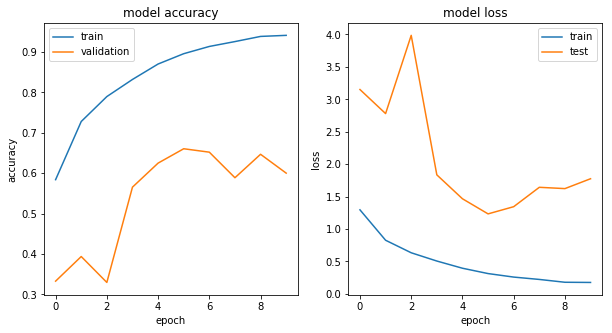

In [26]:
plot_acc_loss(history)

In [49]:
print("Reading test images..")
X_test = [cv2.resize(cv2.imread(x), dsize=(224,224), interpolation = cv2.INTER_AREA) for x in test]
X_test = np.array(X_test)
X_test.shape

Reading test images..


(3347, 224, 224, 3)

In [28]:
model_transfer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               204900    
_________________________________________________________________
dense_5 (Dense)              (None, 11)                1111      
Total params: 23,793,723
Trainable params: 23,740,603
Non-trainable params: 53,120
_________________________________________________________________


In [31]:
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model_transfer.input,
                                 outputs=model_transfer.get_layer("dense_4").output)
train_feats = intermediate_layer_model.predict(X_train)
del X_train
val_feats = intermediate_layer_model.predict(X_val)
del X_val
test_feats = intermediate_layer_model.predict(X_test)
del X_test

In [32]:
train_feats.shape,val_feats.shape,test_feats.shape

((9866, 100), (3430, 100), (3347, 100))

In [33]:
len(train_y), len(val_y), len(test_y)

(9866, 3430, 3347)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=40,n_estimators=150,random_state=100)
clf.fit(train_feats,np.array(train_y))
RF_val_outputs = clf.predict(val_feats)
RF_test_outputs = clf.predict(test_feats)
RF_val_outputs.shape, RF_test_outputs.shape
print("RF accuracies:")
print("val:",accuracy_score(val_y,RF_val_outputs))
print("test:",accuracy_score(test_y,RF_test_outputs))

RF accuracies:
val: 0.7259475218658892
test: 0.7538093815357036


In [45]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma='scale',decision_function_shape='ovo',probability=True)
svc.fit(train_feats,np.array(train_y))
SVM_val_outputs = svc.predict(val_feats)
SVM_test_outputs = svc.predict(test_feats)
SVM_val_outputs.shape, SVM_test_outputs.shape
print("SVM accuracies:")
print("val:",accuracy_score(val_y,SVM_val_outputs))
print("test:",accuracy_score(test_y,SVM_test_outputs))

SVM accuracies:
val: 0.7317784256559767
test: 0.7597848819838662


In [51]:
model_transfer = Sequential()
model_transfer.add(base_model)
model_transfer.add(GlobalAveragePooling2D())
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(100, activation='relu'))
model_transfer.add(Dense(11, activation='softmax'))
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model_transfer.load_weights("resnet50_trainabletrue.hdf5")
tm_val = model_transfer.predict(X_val)
tm_test = model_transfer.predict(X_test)
preds = np.argmax(tm_val, axis=1)
print("Transfer model accuracies:")
print("val", accuracy_score(val_y, preds))
preds2 = np.argmax(tm_test, axis=1)
print("test", accuracy_score(test_y, preds2))

Transfer model accuracies:
val 0.6606413994169096
test 0.6937556020316702


In [52]:
SVM_val_outputs = svc.predict_proba(val_feats)
SVM_test_outputs = svc.predict_proba(test_feats)
SVM_val_outputs.shape, SVM_test_outputs.shape

((3430, 11), (3347, 11))

In [53]:
RF_val_outputs = clf.predict_proba(val_feats)
RF_test_outputs = clf.predict_proba(test_feats)
RF_val_outputs.shape, RF_test_outputs.shape

((3430, 11), (3347, 11))

In [ ]:
# w1 = 3.5; w2 = 1.8; w3 = 1.05# 79
# # xception 
#     # voting scheme: 
#         val: 0.8495626822157435
#         test: 0.8780997908574844
#     # weighted scheme:
#         val: 0.8580174927113703
#         test: 0.8837765162832387

In [64]:
w1 = 4; w2 = 2; w3 = 0.5# 79
# w1 = 1; w2 = 1; w3 = 1# 79
finprobs = []
for i in range(3430):
    p1 = SVM_val_outputs[i].argsort()[-5:][::-1]
    p2 = RF_val_outputs[i].argsort()[-5:][::-1]
    p3 = tm_val[i].argsort()[-5:][::-1]
    p1_scores = sorted(SVM_val_outputs[i])[-5:][::-1]
    p2_scores = sorted(RF_val_outputs[i])[-5:][::-1]
    p3_scores = sorted(tm_val[i])[-5:][::-1]
    probs = [0]*11
    for k in range(5):
        if p1[k]==p2[k] and p1[k] == p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k]) + (w3*p3_scores[k])
        elif p1[k]==p2[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])
        elif p2[k]==p3[k]:
            probs[p2[k]] += (w2*p2_scores[k]) + (w3*p3_scores[k])
            probs[p1[k]] += (w1*p1_scores[k])
        elif p1[k]==p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w3*p3_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
        else:
            probs[p1[k]] += (w1*p1_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])

    probs = np.array(probs).argsort()[-5:][::-1]
    finprobs.append(probs[0])
# print("ensembled!",len(finprobs),len(val_y))
print(0.7317,"- to beat.")
print("val:",accuracy_score(val_y,finprobs))

0.7317 - to beat.
val: 0.7376093294460642


In [65]:
w1 = 4; w2 = 2; w3 = 0.5# 79
# w1 = 1; w2 = 1; w3 = 1# 79
finprobs = []
for i in range(3347):
    p1 = SVM_test_outputs[i].argsort()[-5:][::-1]
    p2 = RF_test_outputs[i].argsort()[-5:][::-1]
    p3 = tm_test[i].argsort()[-5:][::-1]
    p1_scores = sorted(SVM_test_outputs[i])[-5:][::-1]
    p2_scores = sorted(RF_test_outputs[i])[-5:][::-1]
    p3_scores = sorted(tm_test[i])[-5:][::-1]
    probs = [0]*11
    for k in range(5):
        if p1[k]==p2[k] and p1[k] == p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k]) + (w3*p3_scores[k])
        elif p1[k]==p2[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])
        elif p2[k]==p3[k]:
            probs[p2[k]] += (w2*p2_scores[k]) + (w3*p3_scores[k])
            probs[p1[k]] += (w1*p1_scores[k])
        elif p1[k]==p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w3*p3_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
        else:
            probs[p1[k]] += (w1*p1_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])

    probs = np.array(probs).argsort()[-5:][::-1]
    finprobs.append(probs[0])
print("ensembled!",len(finprobs),len(test_y))
print(0.7597,"- to beat.")
print("test:",accuracy_score(test_y,finprobs))

ensembled! 3347 3347
0.7597 - to beat.
test: 0.7651628323872124


In [ ]:

from keras.applications.xception import Xception
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
# from keras.applications.xception import preprocess_input, decode_predictions
from keras.layers import Flatten, Input, Dense

checkpointer = ModelCheckpoint(filepath='xception.hdf5',
                               verbose=1,save_best_only=True)

base_model = Xception(weights='imagenet', include_top = False,input_shape=(224,224,3))
base_model.trainable = True
model_transfer = Sequential()
model_transfer.add(base_model)
model_transfer.add(GlobalAveragePooling2D())
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(100, activation='relu'))
model_transfer.add(Dense(11, activation='softmax'))
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model_transfer.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_val, y_val), callbacks=[checkpointer],
          verbose=1, shuffle=True)


In [ ]:
model_transfer.summary()

In [ ]:
predprobs = model_transfer.predict(X_test)
ytrue = np.array([np.argmax(x) for x in y_test])
ypred = []
for pred in predprobs:
    ypred.append(np.argmax(pred))
from sklearn.metrics import accuracy_score

In [ ]:
ypred = np.array(ypred)
accuracy_score(ytrue,ypred)